In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly
import plotly.graph_objs as go
import plotly.tools as tls

In [151]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [152]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [153]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [154]:
X.shape

(207049, 19)

In [155]:
X_mid, X_test_sc, y_mid, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [156]:
X_train_sc, X_val_sc, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

In [157]:
scaler = StandardScaler()
scaler.fit(X_train_sc)
X_train = scaler.transform(X_train_sc)
X_val = scaler.transform(X_val_sc)
X_test = scaler.transform(X_test_sc)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



### Logistic Regression ###

In [158]:
logistic = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [159]:
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
logistic_pred = logistic.predict(X_val)

In [161]:
print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

Logistic Results:
[[11338  7648]
 [ 5026 17398]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.69      0.78      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.69      0.69     41410
weighted avg       0.69      0.69      0.69     41410



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic score: 0.693939


In [162]:
logistic_y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, logistic_y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

0.7583077015382722


In [163]:
logistic_pred_test = logistic.predict(X_test)

In [164]:
print('Logistic Results:')
print(confusion_matrix(y_test,logistic_pred_test))
print(classification_report(y_test, logistic_pred_test))

Logistic Results:
[[11241  7745]
 [ 5081 17343]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64     18986
           1       0.69      0.77      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.68      0.68     41410
weighted avg       0.69      0.69      0.69     41410



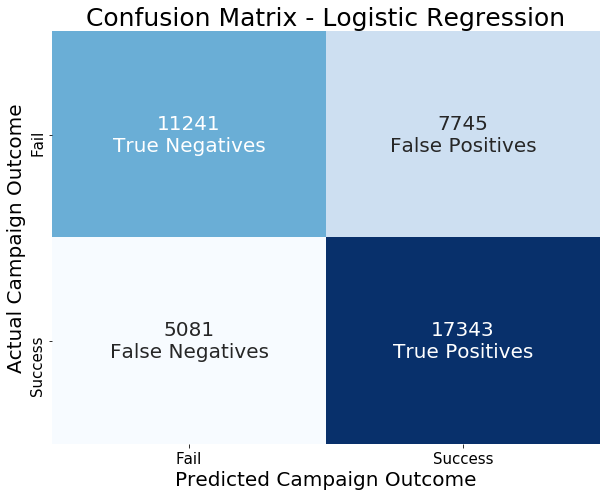

In [165]:
cm = confusion_matrix(y_test,logistic_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Logistic Regression', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Logistic.png')
#plt.savefig('Confusion_matrix_Logistic.svg')
plt.show()

In [166]:
logistic_y_score_test = logistic.predict_proba(X_test)[:, 1]
logistic_fpr_test, logistic_tpr_test, logistic_auc_thresholds = roc_curve(y_test, logistic_y_score_test)
roc_auc_logistic_test = auc(logistic_fpr_test, logistic_tpr_test)
print(auc(logistic_fpr_test, logistic_tpr_test))

0.7557551466185405


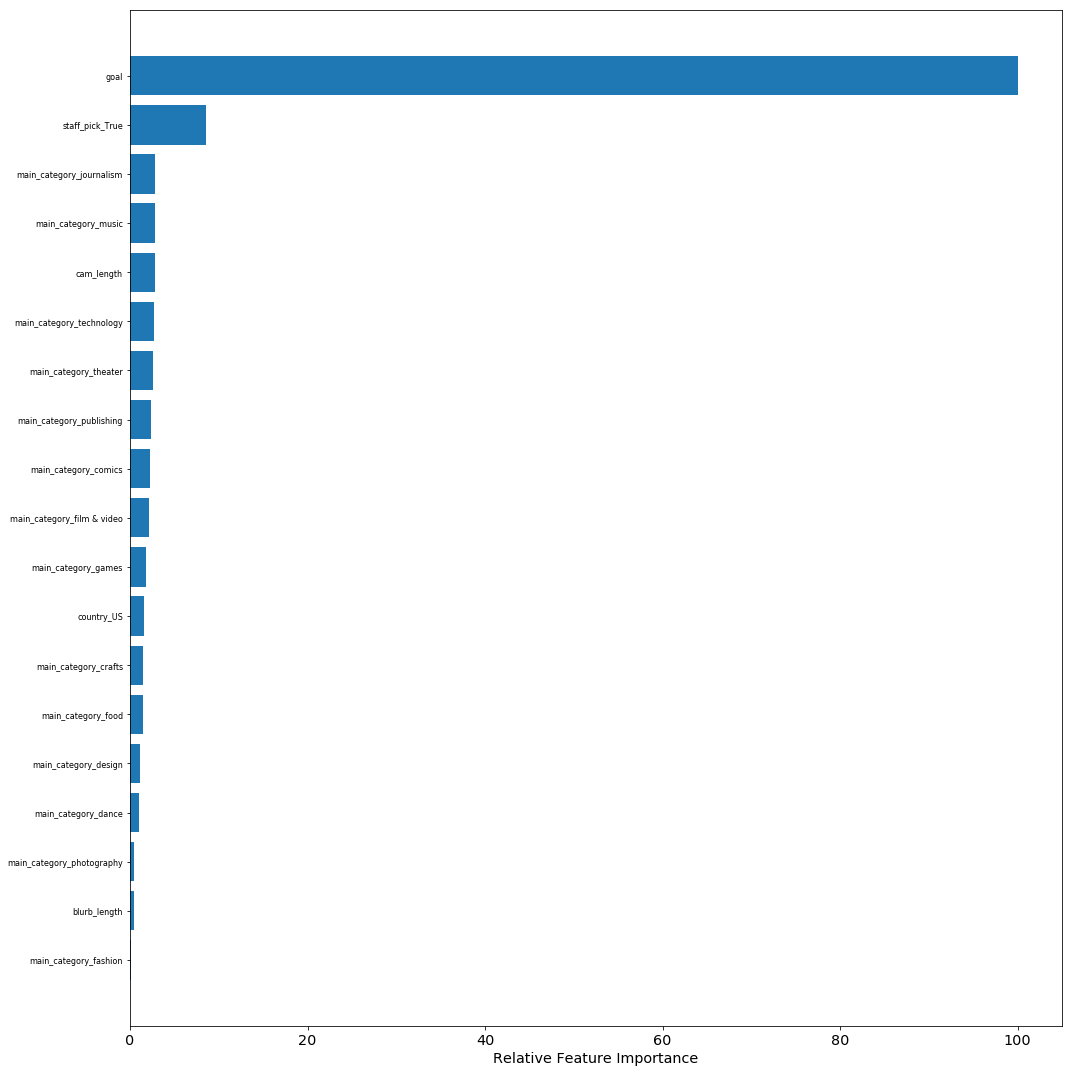

In [167]:
feature_importance = abs(logistic.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [168]:
coefficients  = pd.DataFrame(logistic.coef_.ravel())

In [169]:
cols = [
 'goal',
 'staff_pick_True',
 'cam_length',
 'blurb_length',
 'country_US',
 'main_category_comics',
 'main_category_crafts',
 'main_category_dance',
 'main_category_design',
 'main_category_fashion',
 'main_category_film & video',
 'main_category_food',
 'main_category_games',
 'main_category_journalism',
 'main_category_music',
 'main_category_photography',
 'main_category_publishing',
 'main_category_technology',
 'main_category_theater',]

In [170]:
column_df       = pd.DataFrame(cols)
coef_summary    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_summary.columns = ["coefficients","features"]
coef_summary    = coef_summary.sort_values(by = "coefficients",ascending = False)
    

In [48]:
  # making roc curve, redundant
#     plot_roc(test_y, preds = predictions, probs = probabilities)
    
    # this can be commented out if using non-plotly roc curve above: plot_roc()
logistic_roc_auc = roc_auc_score(y_test, logistic_pred_test) 
print ("Area under curve : ",logistic_roc_auc,"\n")
    
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'),
                            print_grid=False)
    
    
    
bars = go.Bar(x = coef_summary["features"], y = coef_summary["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_summary["coefficients"],
                                  colorscale = "Jet",
                                  line = dict(width = .6, color = "black")))
    
roc_line = go.Scatter(x = logistic_fpr_test, y = logistic_tpr_test,
                        name = "Roc : " + str(logistic_roc_auc),
                        line = dict(color = ('rgb(25, 96, 167)'),width = 2))
    
roc_stand = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(215, 12, 24)'),width = 2,
                        dash = 'dot'))
    
c_matrix = go.Heatmap(z = cm ,
                        x = ["Fail","Success"],
                        y = ["Fail","Success"],
                        showscale  = False, colorscale = "Jet",
                        name = "matrix")
    
    
    
    
fig.append_trace(bars,2,1)
fig.append_trace(roc_line,1,2)
fig.append_trace(c_matrix,1,1)
fig.append_trace(roc_stand,1,2)
    
fig['layout'].update(showlegend = False, title="Model performance" ,
                         autosize = False,height = 1000,width = 850,
                         plot_bgcolor = 'rgba(230,230,230, 0.95)',
                         paper_bgcolor = 'rgba(230,230,230, 0.95)',
                         margin = dict(b = 185))
    
fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
fig["layout"]["xaxis1"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
#     print('\nConfusion Matrix:')
#     print(conf_matrix)
    
    
#py.iplot(fig, filename = 'jupyter-table1')


Area under curve :  0.6827624249033565 

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~auroraborealis666/0 or inside your plot.ly account where it is named 'jupyter-table1'


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Random Forest ###

In [50]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
forest_pred = forest.predict(X_val)

In [55]:
print('Forest Results:')
print(confusion_matrix(y_val, forest_pred))
print(classification_report(y_val, forest_pred))
print('Forest score: %f' % forest.fit(X_train, y_train).score(X_val, y_val))

Forest Results:
[[11824  7162]
 [ 6249 16175]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.64     18986
           1       0.69      0.72      0.71     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.67      0.67      0.67     41410
weighted avg       0.68      0.68      0.68     41410

Forest score: 0.676165


In [56]:
forest_y_score = forest.predict_proba(X_val)[:, 1]
forest_fpr, forest_tpr, auc_thresholds = roc_curve(y_val, forest_y_score)
roc_auc_forest = auc(forest_fpr, forest_tpr)
print(auc(forest_fpr, forest_tpr))

0.7342935251988632


In [57]:
forest_pred_test = forest.predict(X_test)

In [58]:
print('Random Forest Results:')
print(confusion_matrix(y_test,forest_pred_test))
print(classification_report(y_test, forest_pred_test))

Random Forest Results:
[[11885  7101]
 [ 6272 16152]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64     18986
           1       0.69      0.72      0.71     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.67      0.67      0.67     41410
weighted avg       0.68      0.68      0.68     41410



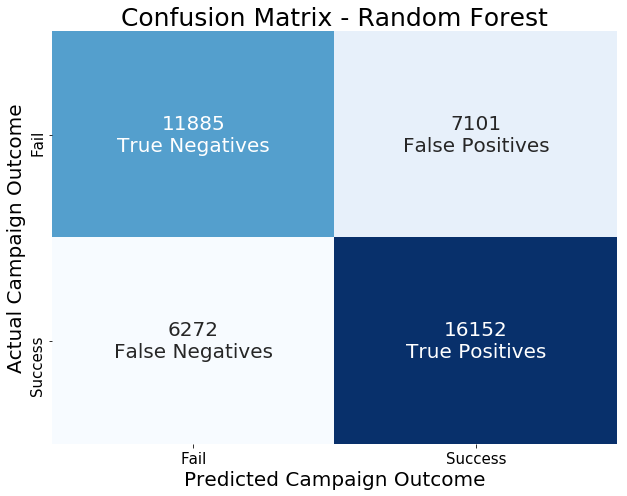

In [59]:
cm = confusion_matrix(y_test,forest_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Random Forest', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Forest.png')
#plt.savefig('Confusion_matrix_Forest.svg')
plt.show()

In [60]:
forest_y_score_test = forest.predict_proba(X_test)[:, 1]
forest_fpr_test, forest_tpr_test, forest_auc_thresholds = roc_curve(y_test, forest_y_score_test)
roc_auc_forest_test = auc(forest_fpr_test, forest_tpr_test)
print(auc(forest_fpr_test, forest_tpr_test))

0.7377711449249704


In [72]:
labels[0]

'Goal in USD'

Feature ranking:
1. feature 0 (0.380932)
Goal in USD
2. feature 3 (0.244644)
Staff Pick
3. feature 2 (0.192537)
Campaign Length
4. feature 1 (0.072396)
Description Length
5. feature 17 (0.022210)
Based in the US
6. feature 13 (0.011720)
Comics
7. feature 4 (0.011500)
Crafts
8. feature 11 (0.007085)
Dance
9. feature 14 (0.006685)
Design
10. feature 6 (0.006445)
Fashion
11. feature 10 (0.006255)
Film & Video
12. feature 18 (0.006059)
Food
13. feature 16 (0.005786)
Games
14. feature 12 (0.005561)
Journalism
15. feature 5 (0.005313)
Music
16. feature 8 (0.004489)
Photography
17. feature 9 (0.004436)
Publishing
18. feature 15 (0.003431)
Technology
19. feature 7 (0.002515)
Theater


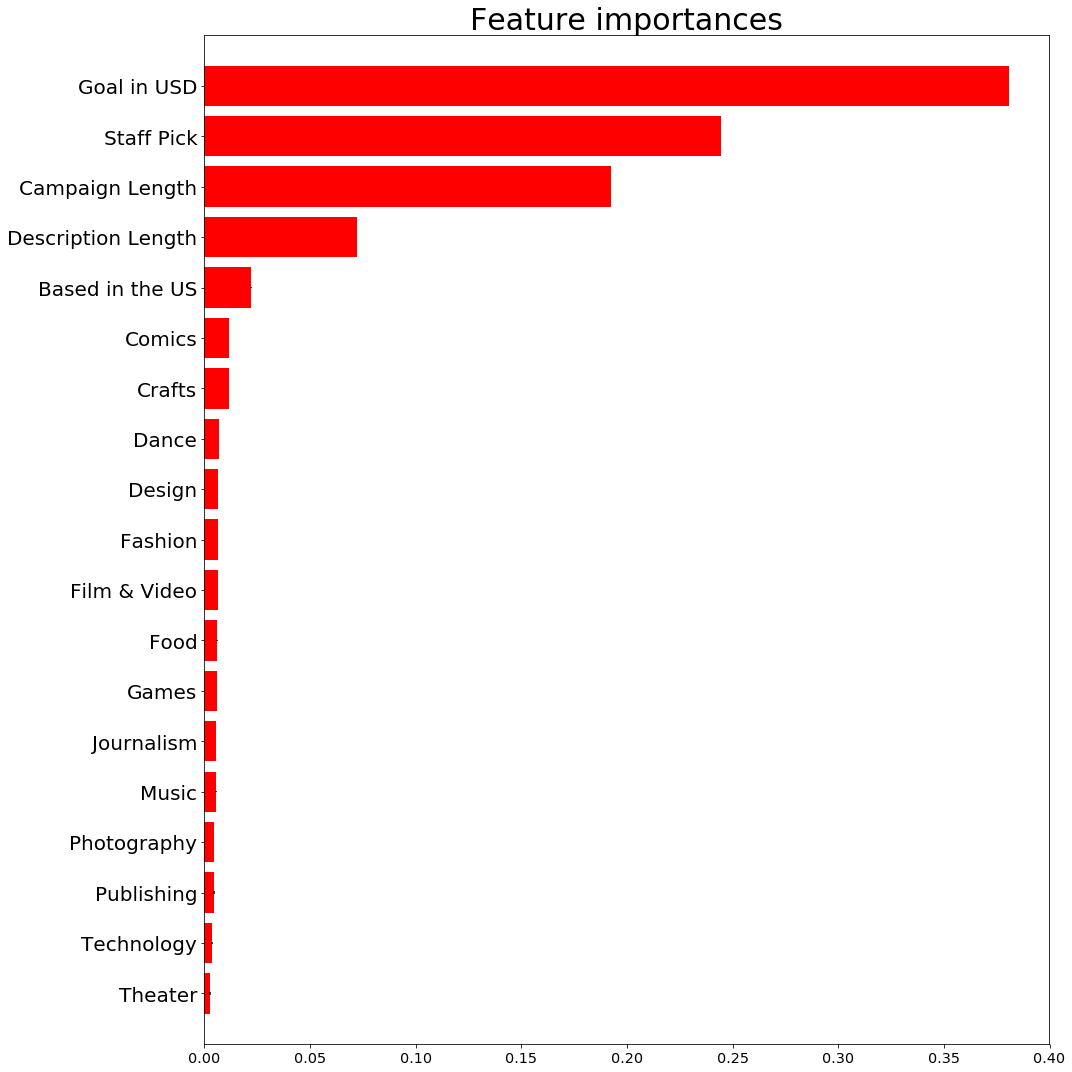

In [94]:
labels = [
 'Goal in USD',
 'Staff Pick',
 'Campaign Length',
 'Description Length',
 'Based in the US',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater']
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
final_labels = []
for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(labels[f])
    final_labels.append(labels[f])
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances", size = 30)

plt.barh(range(X_test.shape[1]), importances[indices][::-1],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), final_labels[::-1], size = 20, rotation = 0)
plt.ylim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig('random_forest_feature_importance_svg.svg')
plt.savefig('random_forest_feature_importance.png')
plt.show()

In [98]:
coefficients  = pd.DataFrame(forest.feature_importances_)

In [101]:
column_df       = pd.DataFrame(cols)
forest_coef_summary    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
forest_coef_summary.columns = ["coefficients","features"]
forest_coef_summary    = forest_coef_summary.sort_values(by = "coefficients",ascending = False)
    

In [102]:
forest_roc_auc = roc_auc_score(y_test, forest_pred_test) 
print ("Area under curve : ",forest_roc_auc,"\n")
    
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'),
                            print_grid=False)
    
    
    
bars = go.Bar(x = forest_coef_summary["features"], y = forest_coef_summary["coefficients"],
                    name = "coefficients",
                    marker = dict(color = forest_coef_summary["coefficients"],
                                  colorscale = "Jet",
                                  line = dict(width = .6, color = "black")))
    
roc_line = go.Scatter(x = forest_fpr_test, y = forest_tpr_test,
                        name = "Roc : " + str(forest_roc_auc),
                        line = dict(color = ('rgb(25, 96, 167)'),width = 2))
    
roc_stand = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(215, 12, 24)'),width = 2,
                        dash = 'dot'))
    
c_matrix = go.Heatmap(z = cm ,
                        x = ["Fail","Success"],
                        y = ["Fail","Success"],
                        showscale  = False, colorscale = "Jet",
                        name = "matrix")
    
    
    
    
fig.append_trace(bars,2,1)
fig.append_trace(roc_line,1,2)
fig.append_trace(c_matrix,1,1)
fig.append_trace(roc_stand,1,2)
    
fig['layout'].update(showlegend = False, title="Model performance" ,
                         autosize = False,height = 1000,width = 850,
                         plot_bgcolor = 'rgba(230,230,230, 0.95)',
                         paper_bgcolor = 'rgba(230,230,230, 0.95)',
                         margin = dict(b = 185))
    
fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
fig["layout"]["xaxis1"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
#     print('\nConfusion Matrix:')
#     print(conf_matrix)
    
    
py.iplot(fig, filename = 'jupyter-table2')

Area under curve :  0.6731436243518564 



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### XGBoost ###

In [103]:
xgBoost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=7, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [104]:
xgBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=7, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [105]:
xgBoost_pred = xgBoost.predict(X_val)

In [106]:
print('XGBoost Results:')
print(confusion_matrix(y_val, xgBoost_pred))
print(classification_report(y_val, xgBoost_pred))
print('XGBoost score: %f' % xgBoost.fit(X_train, y_train).score(X_val, y_val))

XGBoost Results:
[[12051  6935]
 [ 4623 17801]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.68     18986
           1       0.72      0.79      0.75     22424

   micro avg       0.72      0.72      0.72     41410
   macro avg       0.72      0.71      0.72     41410
weighted avg       0.72      0.72      0.72     41410

XGBoost score: 0.720889


In [107]:
xgBoost_y_score = xgBoost.predict_proba(X_val)[:, 1]

In [108]:
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_val, xgBoost_y_score)
roc_auc_xgBoost = auc(xgBoost_fpr, xgBoost_tpr)
print(auc(xgBoost_fpr, xgBoost_tpr))

0.7912842668982786


In [147]:
xgBoost_pred_test = xgBoost.predict(X_test)

In [149]:
xgBoost.predict([10, 30, 0.24414886, 0.04240935,  0.56599264,
       -0.21773993, -0.15281895, -0.10589387, 0.17668643, -0.26982191,
       -0.40234887, -0.29229358, -0.25988079, -0.1363122 , -0.4128152 ,
       -0.17738287, -0.30923274, -0.36534622,  5.3262231 ])

array([1])

In [135]:
print('XGBoost Results:')
print(confusion_matrix(y_test,xgBoost_pred_test))
print(classification_report(y_test, xgBoost_pred_test))

XGBoost Results:
[[12019  6967]
 [ 4651 17773]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67     18986
           1       0.72      0.79      0.75     22424

   micro avg       0.72      0.72      0.72     41410
   macro avg       0.72      0.71      0.71     41410
weighted avg       0.72      0.72      0.72     41410



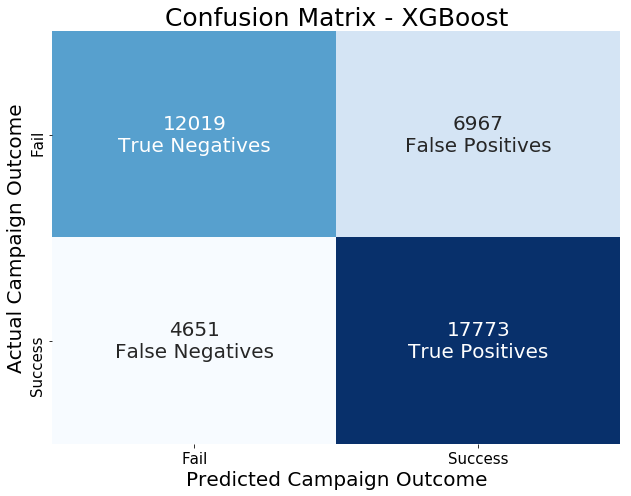

In [136]:
cm = confusion_matrix(y_test,xgBoost_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - XGBoost', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_XGBoost.png')
#plt.savefig('Confusion_matrix_XGBoost.svg')
plt.show()

In [137]:
xgBoost_y_score_test = xgBoost.predict_proba(X_test)[:, 1]
xgBoost_fpr_test, xgBoost_tpr_test, xgBoost_auc_thresholds = roc_curve(y_test, xgBoost_y_score_test)
roc_auc_xgBoost_test = auc(xgBoost_fpr_test, xgBoost_tpr_test)
print(auc(xgBoost_fpr_test, xgBoost_tpr_test))

0.7895514054725867


In [138]:
from xgboost import plot_importance
from matplotlib import pyplot

In [146]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
f = 'gain'
xgBoost.get_booster().get_score(importance_type= f)

{'f1': 488.4752822113722,
 'f0': 32.05965059317555,
 'f17': 112.50241236776824,
 'f13': 102.59094928753083,
 'f2': 12.064359293519157,
 'f6': 53.84683809732559,
 'f4': 13.280718693589574,
 'f8': 21.537233264350515,
 'f12': 24.45268799166415,
 'f3': 4.834350769918429,
 'f10': 21.946314381072728,
 'f9': 20.687760710163914,
 'f15': 20.002154470491526,
 'f11': 31.40402928877776,
 'f18': 50.460851158985506,
 'f14': 29.670250582766908,
 'f16': 34.631575472307695,
 'f5': 31.00303768674684,
 'f7': 20.467239907897955}

In [139]:
print(xgBoost.feature_importances_)

[0.02847424 0.43384632 0.01071513 0.0042937  0.01179546 0.02753579
 0.04782484 0.01817827 0.0191286  0.01837413 0.01949193 0.02789194
 0.02171801 0.09111763 0.02635206 0.0177652  0.03075853 0.09992063
 0.04481753]


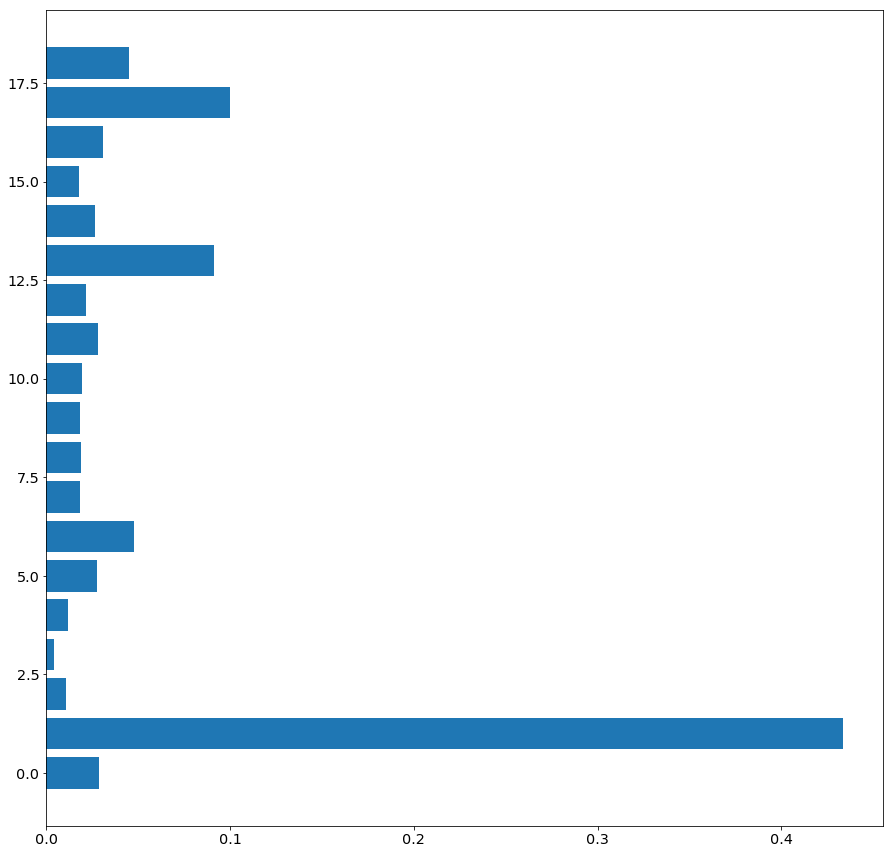

In [143]:
pyplot.barh(range(len(xgBoost.feature_importances_)), xgBoost.feature_importances_)
pyplot.show()

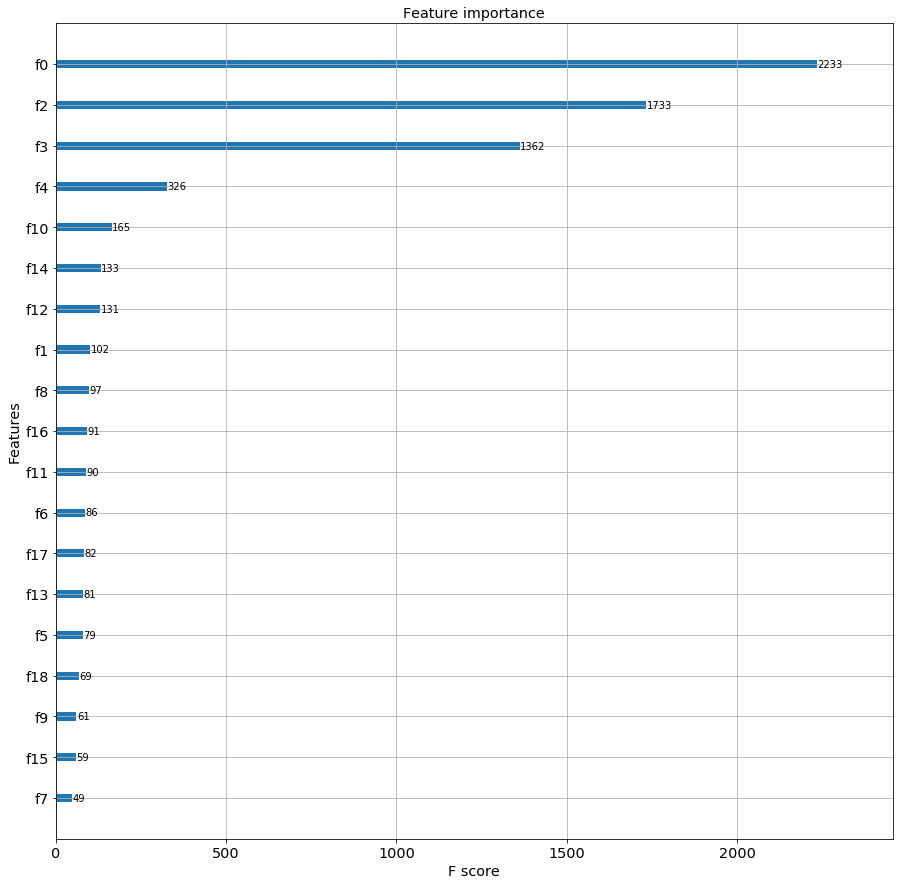

In [141]:
plot_importance(xgBoost)
pyplot.show()

### Optimizing for Precision Experiment with XGBoost - Did not result in an improvement of the outcome ###

In [121]:
y_probs = xgBoost.predict_proba(X_test)[:, 1]
precisions = []
thresholds = []
for t in range(0,100,5):
    y_pred = pd.Series(y_probs).apply(lambda x: 0 if x<(t/100) else 1)
    precisions.append(metrics.precision_score(y_test, y_pred))
    thresholds.append(t/100)

In [122]:
np.argmax(np.array(precisions))

19

In [123]:
thresholds[19]

0.95

In [124]:
max(precisions)

0.958904109589041

In [125]:
y_pred_precise = pd.Series(y_probs).apply(lambda x: 0 if x<(95/100) else 1)

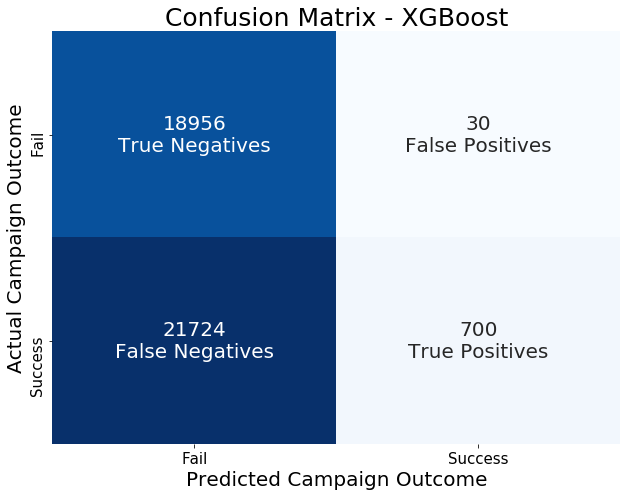

In [126]:
cm = confusion_matrix(y_test,y_pred_precise)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - XGBoost', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.show()